In [1]:
import pandas as pd
import spacy

nlp = spacy.load('en_core_web_sm')
df = pd.read_csv('train.csv')
df_clean = df
df_clean['isToxic'] = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].any(axis=1).astype(int)
df_clean = df_clean[['comment_text', 'isToxic']].copy()
df_clean.rename(columns={'comment_text': 'Text'}, inplace=True)
df_toxic = df_clean[df_clean['isToxic'] == 1]
df_non_toxic = df_clean[df_clean['isToxic'] == 0].sample(n=len(df_toxic))
df_equilibre = pd.concat([df_toxic, df_non_toxic])


c:\Users\justi\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


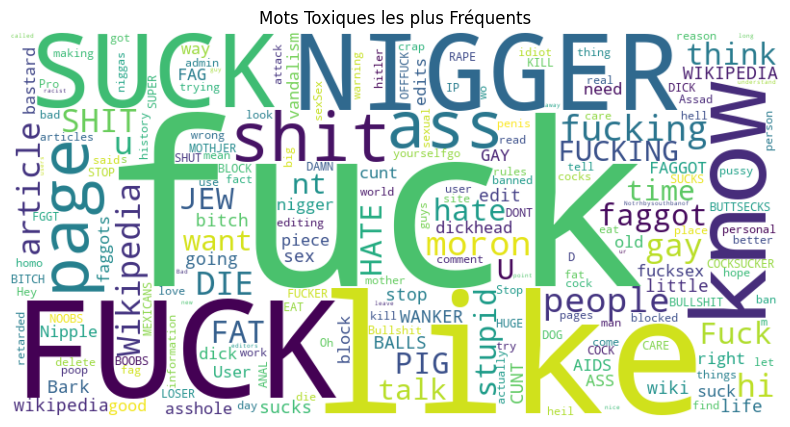

In [12]:
import pandas as pd
import spacy
import joblib
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

nlp = spacy.load('en_core_web_sm')

# Charger le modèle entraîné
model = joblib.load('model.joblib')

# Charger le DataFrame
df = pd.read_csv('train.csv')
df_clean = df
df_clean['isToxic'] = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].any(axis=1).astype(int)
df_clean = df_clean[['comment_text', 'isToxic']].copy()
df_clean.rename(columns={'comment_text': 'Text'}, inplace=True)
df_toxic = df_clean[df_clean['isToxic'] == 1]
df_non_toxic = df_clean[df_clean['isToxic'] == 0].sample(n=len(df_toxic))
df_equilibre = pd.concat([df_toxic, df_non_toxic])

def treat_comment(comment):
    spacy_comment = nlp(comment, disable=["parser", "tagger", "ner", "textcat"])
    treated_tokens = [w.text for w in spacy_comment if w.is_alpha and not w.is_stop]
    return " ".join(treated_tokens)

# Appliquer la fonction treat_comment aux commentaires
df_equilibre['Text'] = df_equilibre['Text'].map(treat_comment)

# Obtenir les commentaires toxiques
toxic_comments = df_equilibre[df_equilibre['isToxic'] == 1]['Text']

# Compter la fréquence des mots
word_counts = Counter(" ".join(toxic_comments).split())

# Créer un graphique avec les mots les plus fréquents
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mots Toxiques les plus Fréquents')
plt.show()
